
## 인공신경망 활용
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성합니다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

- **reference**
    - https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현해봅니다.

# 1번
- 필요한 모듈을 모두 이곳에 나열하세요
- 2점

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
from torch import nn, optim

# 2번
- FashionMNIST 데이터(train, test)를 불러오세요
- 2점

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9955648.15it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208987.30it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3887561.22it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5426558.68it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# 3번
- train, test DataLoader를 만듭니다.
- 배치사이즈: 64
- 2점

In [ ]:
batch_size = 64

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset = training_data,
    batch_size =batch_size,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size =batch_size,
    shuffle = False
)

# 4번
- Device 설정은 GPU로 합니다
- 2점

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# 5번
- train, test의 shape를 확인합니다.
- 2점

In [ ]:
print(training_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


# 6번
- train, test의 첫번째 인덱스 데이터를 이미지로 확인합니다.
- 2점

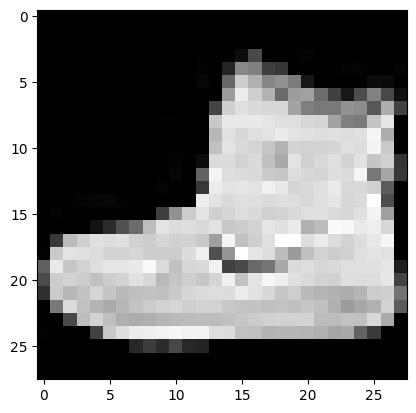

In [ ]:
# train
plt.imshow(training_data.data[0], cmap='gray')
plt.show()

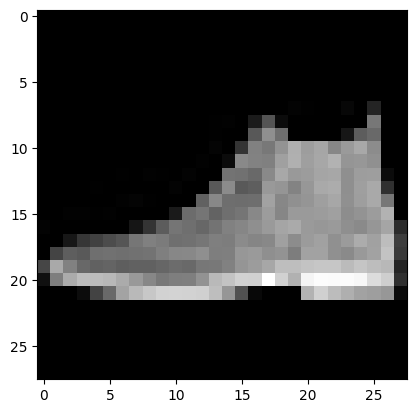

In [ ]:
# test
plt.imshow(test_data.data[0], cmap='gray')
plt.show()

# 7번
- FashionMNIST의 클래스를 labels_map 이름의 딕셔너리로 생성합니다.
- 2점

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 8번
- 2행 5열로 train 데이터를 이미지로 출력합니다.
- labels_map를 이용하여 이미지의 label도 함께 출력합니다.
- 2점

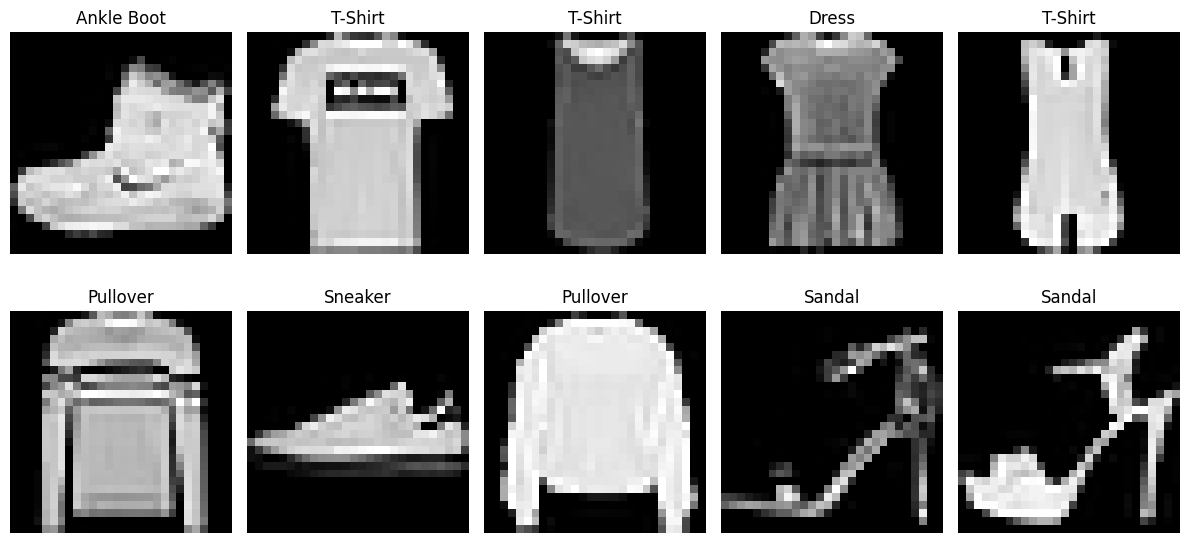

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
axes = axes.flatten()

for i in range(10):
    img, label = training_data[i]
    ax = axes[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(labels_map[label])
    ax.axis('off')

plt.tight_layout()
plt.show()

# 9번
- reference를 참고하여 인공신경망 클래스를 설계합니다.
- 2점

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# 10번
- 인공신경망 객체를 GPU에 저장합니다.
- 2점

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# 11번
- 28*28 텐서를 GPU에 만들어 인공신경망에 input으로 넣어줍니다.
- 학습되지 않은 모델의 예측 결과를 출력합니다.
- 3점

In [ ]:
x = torch.rand(1, 28, 28, device=device)
logits = model(x)
y_pred = logits.argmax(1)
print(f"예측값: {y_pred.item()}")

예측값: 3


# 12번
- 예측값을 소프트맥스 함수를 넣고 가장 높은 확률의 값을 출력합니다.
- 3점

In [ ]:
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

print(f"가장 높은 확률: {pred_probab.max(1).values.item()}")

가장 높은 확률: 0.10523723065853119


# 13번
- Loss 함수를 정의합니다.
- 학습률을 0.001로 설정합니다.
- 옵티마이저는 Adam을 사용합니다.
- 3점

In [ ]:
loss_fn = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 14번
- 학습 함수를 train_loop로 작성합니다.
- 매개변수(데이터로더, 모델, loss 함수, 옵티마이저)
- 데이터로더의 인덱스가 배치사이즈마다 loss를 출력합니다.
- 3점

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    for i, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % batch_size == 0:
            print(f"Batch {i}: Loss = {loss.item()}")

# 15번
- 테스트 함수를 test_loop로 작성합니다.
- 매개변수(데이터로더, 모델, loss 함수)
- 데이터로더의 크기만큼 반복하며 loss를 출력하고 전체 accuracy와 평균 loss를 구합니다.
- 3점

In [ ]:
def test_loop(dataloader, model, loss_fn):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            total_loss += loss_fn(pred, y).item()

            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            print('loss: ', loss_fn(pred, y).item())

    avg_loss= total_loss / len(dataloader)
    accuracy = 100 * correct / len(dataloader.dataset)

    return avg_loss, accuracy

# 16번
- 100번의 epochs를 돌며 학습을 반복합니다.
- 3점

In [ ]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}번째")
    train_loop(train_loader, model, loss_fn, optimizer)
print('학습 완료')

Epoch 1번째
Batch 0: Loss = 0.19868971407413483
Batch 64: Loss = 0.191758930683136
Batch 128: Loss = 0.44404199719429016
Batch 192: Loss = 0.314800888299942
Batch 256: Loss = 0.27994126081466675
Batch 320: Loss = 0.26133397221565247
Batch 384: Loss = 0.32314246892929077
Batch 448: Loss = 0.1785016655921936
Batch 512: Loss = 0.40984904766082764
Batch 576: Loss = 0.20906758308410645
Batch 640: Loss = 0.23377688229084015
Batch 704: Loss = 0.1306539922952652
Batch 768: Loss = 0.3640681505203247
Batch 832: Loss = 0.2530798316001892
Batch 896: Loss = 0.2873731255531311
Epoch 2번째
Batch 0: Loss = 0.1707349717617035
Batch 64: Loss = 0.37645813822746277
Batch 128: Loss = 0.3562278151512146
Batch 192: Loss = 0.1942543089389801
Batch 256: Loss = 0.26623186469078064
Batch 320: Loss = 0.2182641625404358
Batch 384: Loss = 0.15656062960624695
Batch 448: Loss = 0.11475571990013123
Batch 512: Loss = 0.24590009450912476
Batch 576: Loss = 0.21647892892360687
Batch 640: Loss = 0.2867949306964874
Batch 704: L

# 17번
- 학습된 파라미터를 저장합니다.
- 파일명은 model_weights.pth로 합니다.
- 3점

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

# 18번
- 새로운 인공신경망을 GPU에 만들고 위 학습된 파일(model_weights.pth)을 불러옵니다.
- 3점

In [ ]:
new_model = NeuralNetwork().to(device)
new_model.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

# 19번
- 위 모델에 test 데이터로더를 입력하고 결과를 확인합니다.
- 3점

In [ ]:
test_loop(test_loader, new_model, loss_fn)

loss:  1.7907695770263672
loss:  0.06244543939828873
loss:  1.4205172061920166
loss:  2.447646379470825
loss:  0.561397135257721
loss:  0.31484898924827576
loss:  0.699815571308136
loss:  1.352189064025879
loss:  1.7259607315063477
loss:  1.1797065734863281
loss:  1.7771929502487183
loss:  1.0116177797317505
loss:  1.2279198169708252
loss:  0.9964390993118286
loss:  0.5197806358337402
loss:  1.5356616973876953
loss:  0.6371504068374634
loss:  0.632676362991333
loss:  1.573265552520752
loss:  0.6127293705940247
loss:  1.896911859512329
loss:  0.560262143611908
loss:  0.686298131942749
loss:  0.23403893411159515
loss:  1.0458670854568481
loss:  0.5061076283454895
loss:  1.0159499645233154
loss:  0.3051567077636719
loss:  1.2828505039215088
loss:  0.8828699588775635
loss:  0.5636084079742432
loss:  0.4003693461418152
loss:  2.1231024265289307
loss:  0.29976728558540344
loss:  4.47278356552124
loss:  0.9581412076950073
loss:  0.6874723434448242
loss:  1.0706043243408203
loss:  1.1510691642

(1.1429672413475953, 89.34)

# 20번
- 2행 5열로 test 데이터를 이미지로 출력합니다.
- 학습된 모델이 분류기가 잘 작동하는지 label과 예측된 결과를 동시에 출력합니다.
- 3점

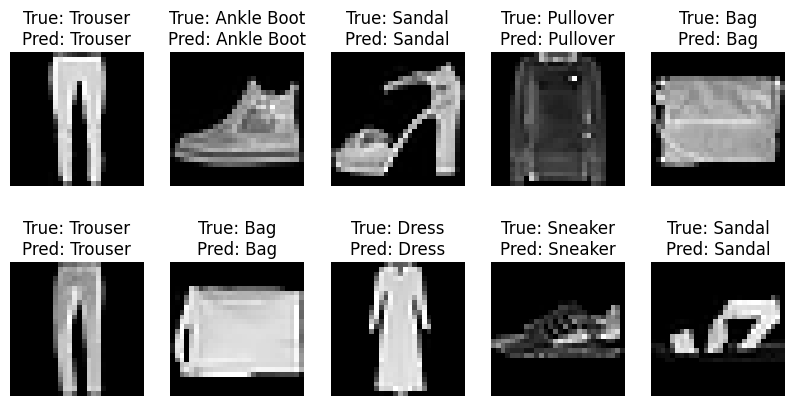

In [ ]:
new_model.eval()

images, labels = next(iter(test_loader))
images, labels = images[:10], labels[:10]
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    predictions = new_model(images).argmax(1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
    plt.title(f"True: {labels_map[labels[i].item()]}\nPred: {labels_map[predictions[i].item()]}")
    plt.axis('off')
plt.show()